# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import precision_recall_fscore_support,accuracy_score,roc_auc_score,roc_curve,accuracy_score

# Load Data, Eksplorasi Data Sederhana, dan Data Cleaning

Proses:
- Menampilkan data secara sekilas
- Menampilkan informasi struktur data
- Menampilkan statistik deskriptif data
- Ubah nama kolom
- Cek duplikasi
- Visualisasi data sederhana untuk kolom-kolom yang dibutuhkan/perlu dilihat visualisasinya
- Menindak hasil temuan


In [2]:
data=pd.read_csv("bank-additional-full.csv",delimiter=';')

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data=data.rename(columns={'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'})

In [6]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Ada data aneh pada pdays yaitu data berpusat di 962 sedangkan standar deviasi tinggi (186.9). Perlu dicrosscek bagaimana pengaruh nilai 999 terhadap distribusi keseluruhan data. Dari sini juga terlihat bahwa dari 20 kolom, hanya 10 yang merupakan data numerik.

<AxesSubplot:>

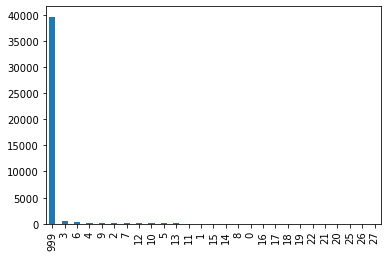

In [8]:
data.pdays.value_counts().plot(kind='bar')

Ada hampir 4000 data bernilai 999. Nilai 999 tidak bisa dihapus, ada penyesuaian untuk kolom pdays dimana pdays akan diubah ke kolom baru yaitu contacted dengan nilai yes dan no, dimana yes adalah yang sudah dikontak, dan no yang belum

In [9]:
data['contacted']=data.pdays.apply(lambda x: 'yes' if x!=999 else 'no')
dat=data.drop(columns='pdays')

In [10]:
dat.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no


In [11]:
dat.describe()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# EDA

In [12]:
num_dat=dat[dat.describe().columns.values]
cat_dat=dat.drop(columns=dat.describe().columns.values)

In [13]:
num_dat.head()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0


In [14]:
cat_dat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,contacted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,no


## Distribusi Data Numerik

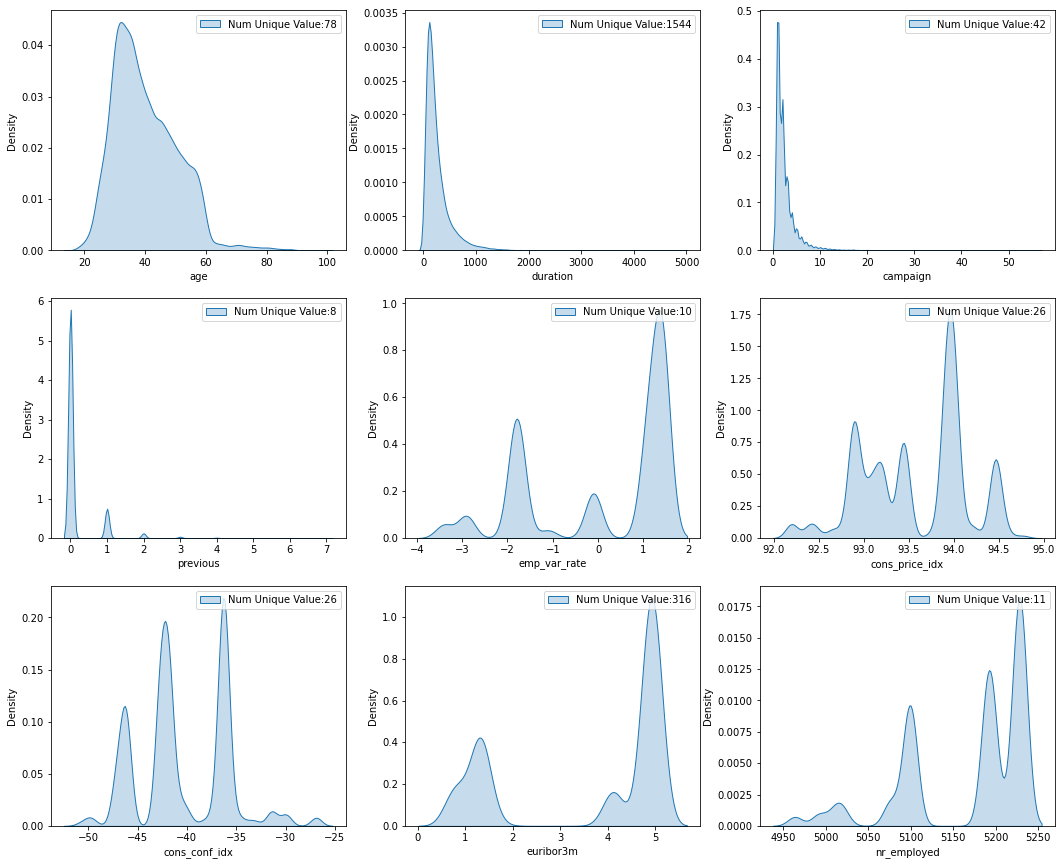

In [15]:
fig,axes=pl.subplots(nrows=3,ncols=3,figsize=(18,15))
i=0
j=0
for col in num_dat.columns:
    sns.kdeplot(data=num_dat, x=col, fill=True,ax=axes[i][j],label='Num Unique Value:{}'.format(len(num_dat[col].unique())))
    axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0

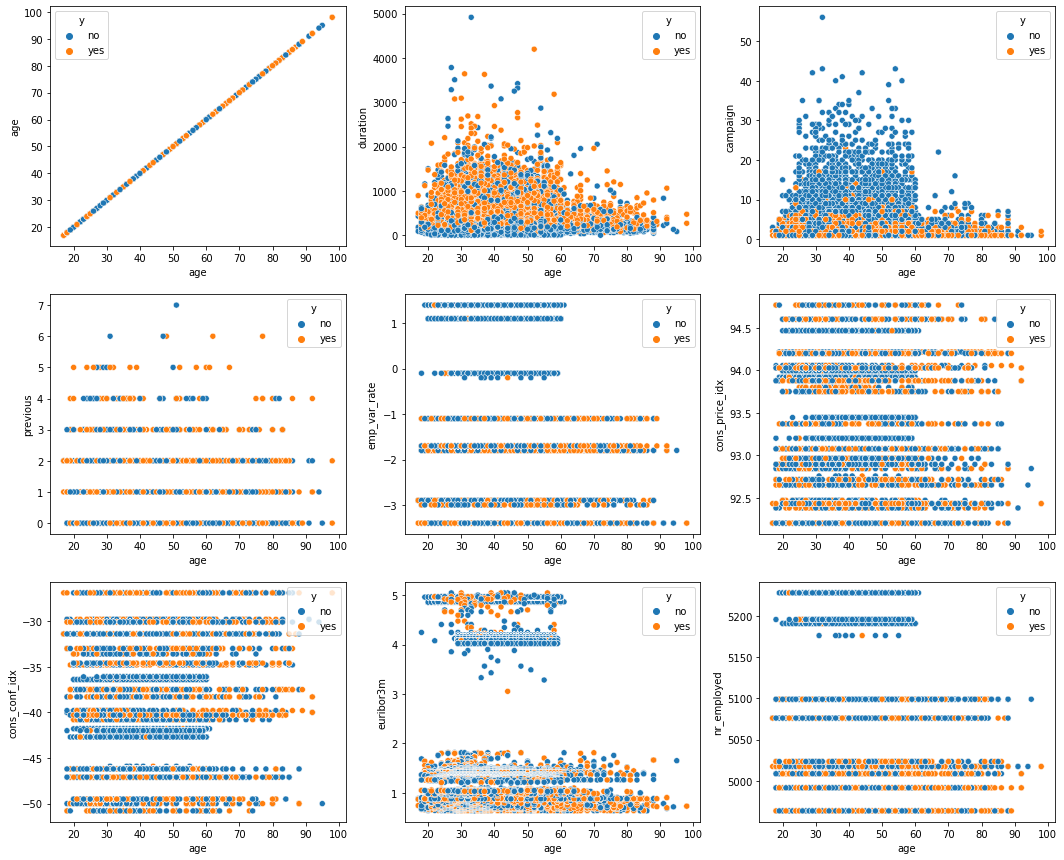

In [16]:
#Hubungan semua data numerik dengan age untuk melihat kontinuitas

fig,axes=pl.subplots(nrows=3,ncols=3,figsize=(18,15))
i=0
j=0
for col in num_dat.columns:
    sns.scatterplot(data=dat, x='age',y=col, hue='y',ax=axes[i][j])
    #axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0

## Distribusi Categorical Data

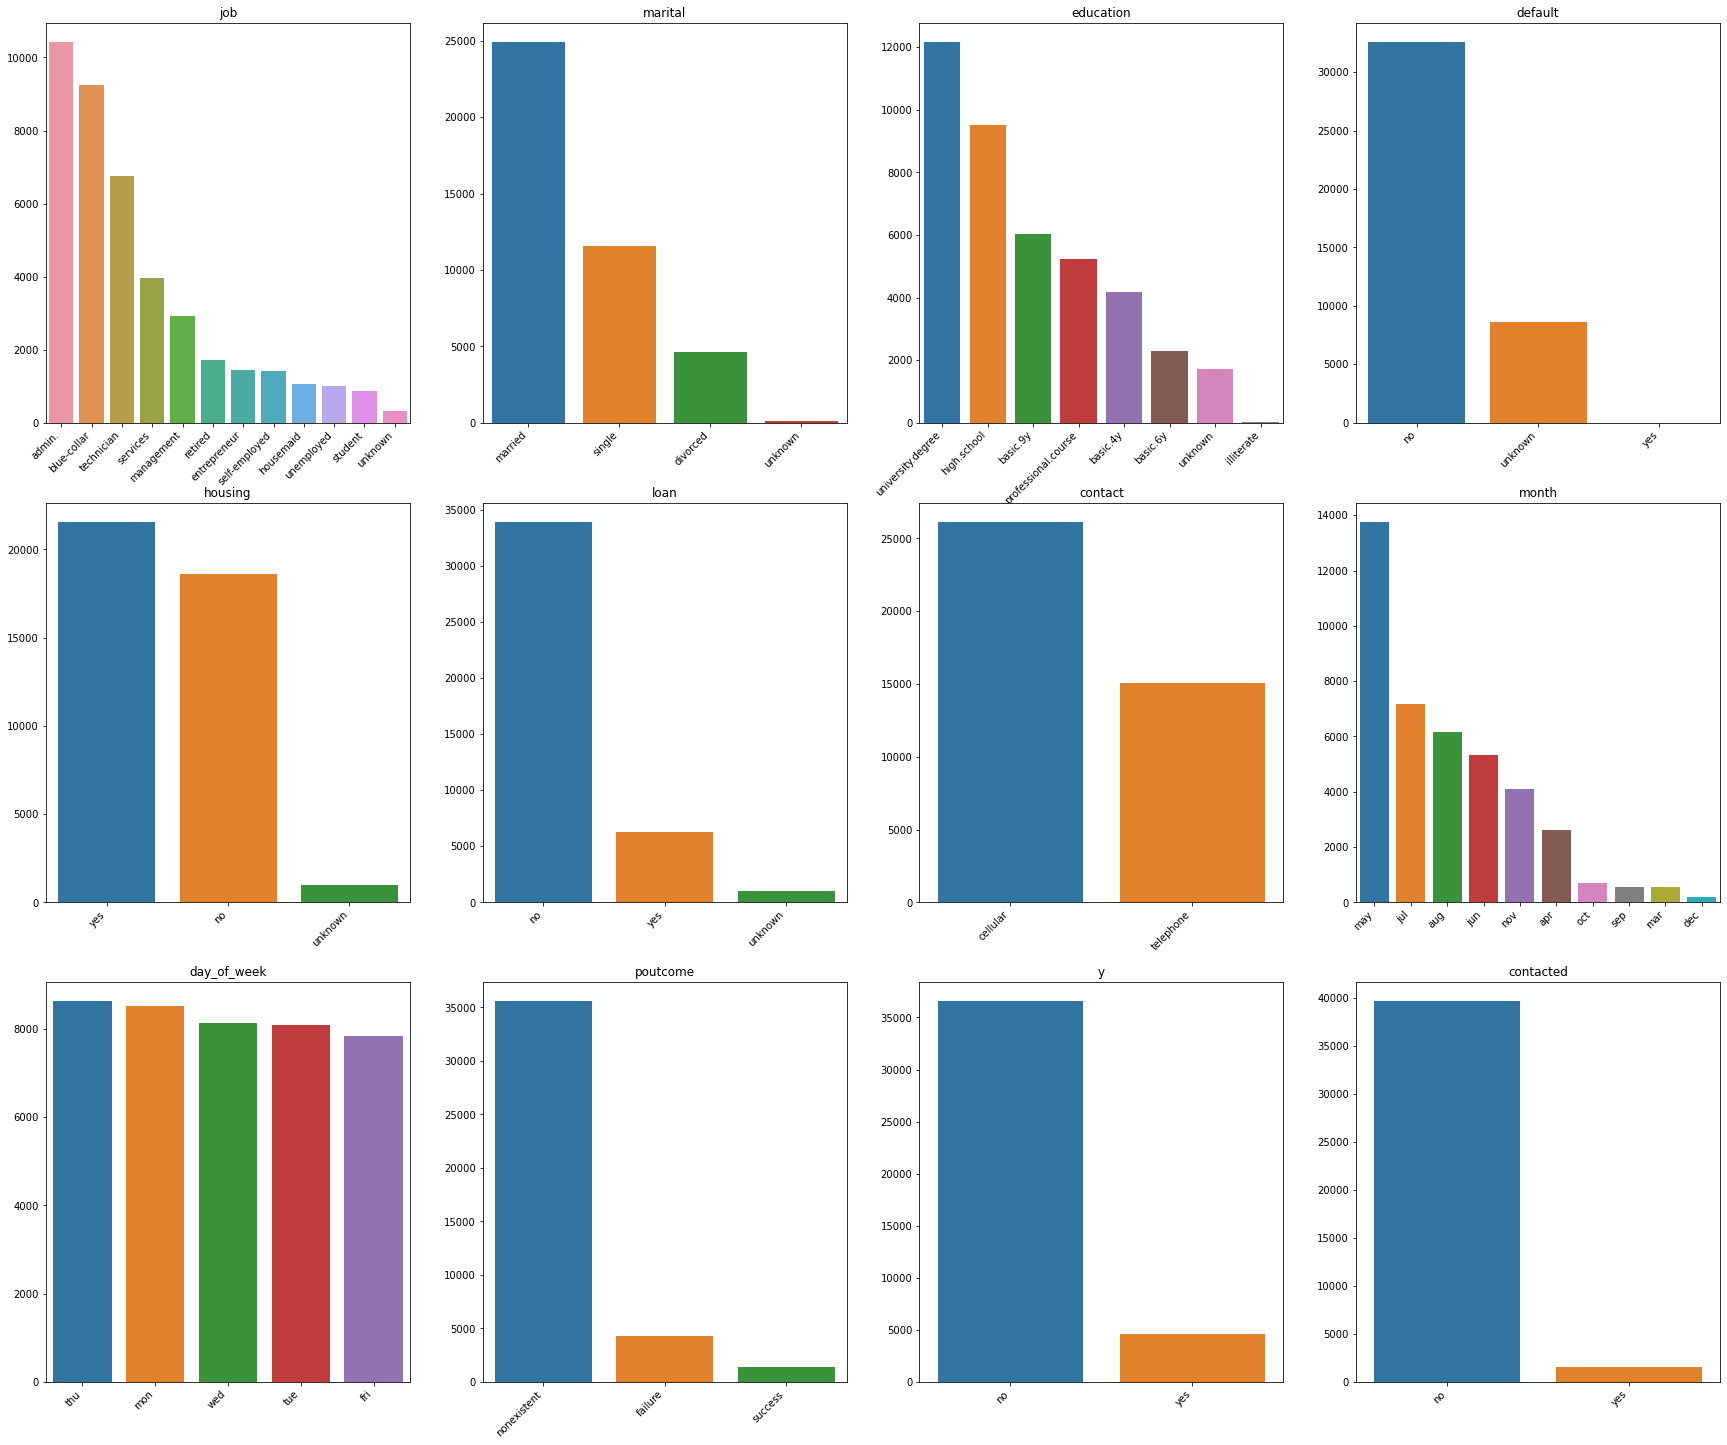

In [17]:
fig,axes=pl.subplots(nrows=3,ncols=4,figsize=(30,25))
i=0
j=0

for col in cat_dat.columns:
    val=cat_dat[col].value_counts()
    sns.barplot(x=val.index, y=val.values, ax=axes[i][j])
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=45, ha='right')
    axes[i][j].set_title(col)
    j+=1
    if j>3:
        i+=1
        j=0

**Ordinal Data**: Day_of_Week dan Month

**Nominal**: Rest

<AxesSubplot:xlabel='month,y'>

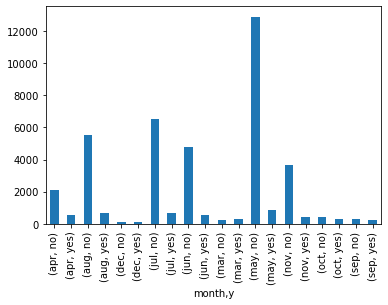

In [18]:
cat_dat.groupby(['month','y']).count()['job'].plot(kind='bar')

<AxesSubplot:>

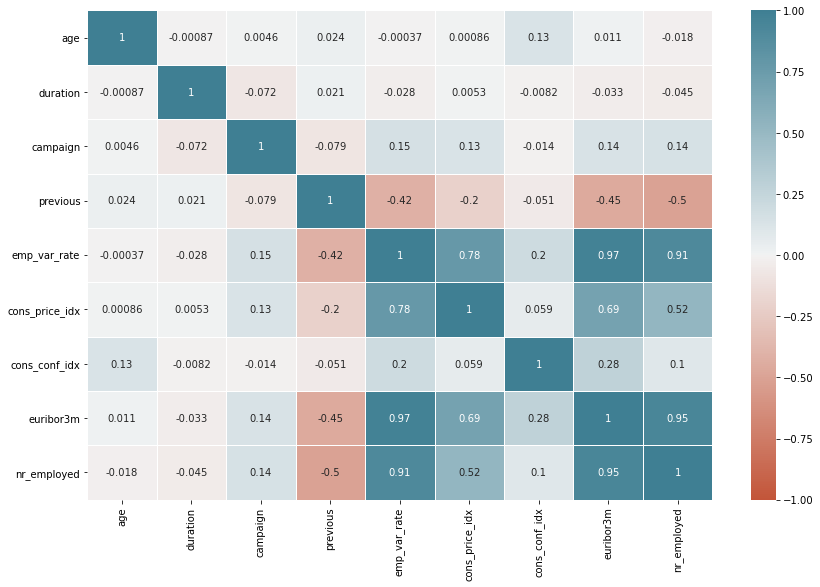

In [19]:
fig, ax = pl.subplots(figsize=(14,9))
sns.heatmap(dat.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)

# Data Preprocessing

## Resampling Data -> Undersampling

In [20]:
dat_yes=dat[dat.y=='yes']
dat_no=dat[dat.y=='no'].sample(len(dat_yes),random_state=100)
dat_resampled=pd.concat([dat_yes,dat_no],axis=0).reset_index(drop=True)
dat_resampled=dat_resampled.sample(len(dat_resampled),random_state=100)
num_dat=dat_resampled[dat_resampled.describe().columns.values]
cat_dat=dat_resampled.drop(columns=dat_resampled.describe().columns.values)

## PCA for Numerical Data

In [21]:
from sklearn.decomposition import PCA
import numpy as np

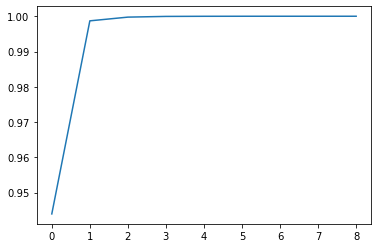

In [22]:
pca=PCA()
pca.fit(num_dat)
cumsum = np.cumsum(pca.explained_variance_ratio_)

pl.figure()
pl.plot(cumsum)

In [23]:
pca=PCA(n_components=0.999).fit(num_dat)
pca.n_components_

3

In [24]:
pca=PCA(n_components=7).fit(num_dat)
np.sum(pca.explained_variance_ratio_)

0.9999993622719543

In [25]:
pca_2d=PCA(n_components=2).fit(num_dat)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[9.43949500e-01 5.47462783e-02 1.05556781e-03 1.99812641e-04
 3.61436497e-05 9.65437503e-06 2.40575949e-06]
0.9999993622719543


In [26]:
X2D=pca_2d.transform(num_dat)

In [27]:
X2D

array([[-241.22499869,  -95.09773318],
       [ -72.75135871,  -55.68385886],
       [  54.8464788 ,  119.70273506],
       ...,
       [-176.00296078,   34.88662131],
       [-326.98516471,   32.75943601],
       [-239.22053041,  -95.10567399]])

In [28]:
X2D.shape

(9280, 2)

<AxesSubplot:>

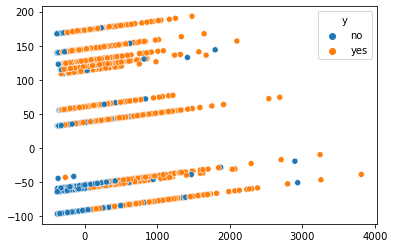

In [29]:
sns.scatterplot(x=X2D[:,0],y=X2D[:,1],hue=dat_resampled.y)

<AxesSubplot:>

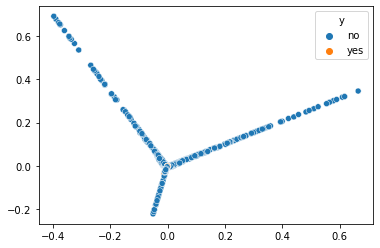

In [30]:
from sklearn.decomposition import KernelPCA
kernel_pca=KernelPCA(n_components=2,kernel='rbf',gamma=0.0433).fit_transform(num_dat)
sns.scatterplot(x=kernel_pca[:,0],y=kernel_pca[:,1],hue=dat_resampled.y)

<AxesSubplot:>

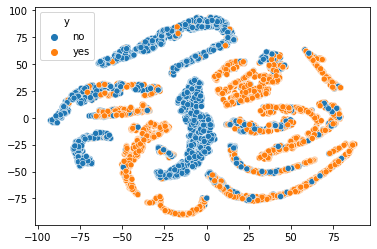

In [31]:
from sklearn.manifold import TSNE
TSNE_2d=TSNE(n_components=2,random_state=42).fit_transform(num_dat)
sns.scatterplot(x=TSNE_2d[:,0],y=TSNE_2d[:,1],hue=dat_resampled.y)

<AxesSubplot:>

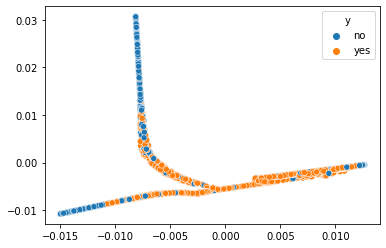

In [32]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
LLE_2d=LLE(n_components=2, n_neighbors=50, random_state=42).fit_transform(num_dat)
sns.scatterplot(x=LLE_2d[:,0],y=LLE_2d[:,1],hue=dat_resampled.y)

<AxesSubplot:>

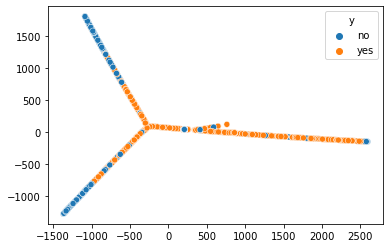

In [33]:
from sklearn.manifold import Isomap
isomap_2d=Isomap(n_components=2).fit_transform(num_dat)
sns.scatterplot(x=isomap_2d[:,0],y=isomap_2d[:,1],hue=dat_resampled.y)

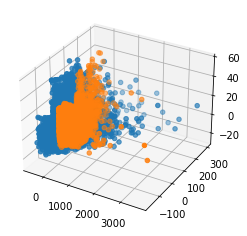

In [34]:
from mpl_toolkits.mplot3d import Axes3D
X3D_yes=PCA(n_components=3).fit_transform(num_dat.loc[dat_resampled[dat_resampled.y=='yes'].index.values])
X3D_no=PCA(n_components=3).fit_transform(num_dat.loc[dat_resampled[dat_resampled.y=='no'].index.values])
fig = pl.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X3D_yes[:,0],X3D_yes[:,1],X3D_yes[:,2])
ax.scatter(X3D_no[:,0],X3D_no[:,1],X3D_no[:,2])

**Dimensionality Reduction Terbaik: 3D PCA**

In [64]:
pca_3d=PCA(n_components=3).fit(num_dat)
num_reduced=pca_3d.transform(num_dat)

In [65]:
num_reduced

array([[-241.22499869,  -95.09773318,  -10.29882055],
       [ -72.75135871,  -55.68385886,   -9.62056608],
       [  54.8464788 ,  119.70273506,  -11.99023348],
       ...,
       [-176.00296078,   34.88662131,   -6.38086903],
       [-326.98516471,   32.75943601,  -11.45733005],
       [-239.22053041,  -95.10567399,  -10.75068618]])

## Data Encoding untuk Categorical Data
### Label Encoder untuk Data Ordinal

In [37]:
ordinal=cat_dat[['month','day_of_week']]
print(ordinal['month'].unique())
print(ordinal['day_of_week'].unique())

['aug' 'may' 'sep' 'oct' 'apr' 'jun' 'jul' 'dec' 'mar' 'nov']
['mon' 'tue' 'thu' 'fri' 'wed']


In [38]:
ordinal.month.replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},inplace=True)
ordinal.day_of_week.replace({'sun':0,'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6},inplace=True)

/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [39]:
ordinal.reset_index(drop=True,inplace=True)
ordinal

,month,day_of_week
0,8,1
1,5,2
2,9,2
3,10,4
4,8,5
...,...,...
9275,6,1
9276,5,4
9277,5,1
9278,5,3


### One Hot Encoder using pandas get_dummies

In [40]:
nominal=pd.get_dummies(cat_dat.drop(columns=['month','day_of_week','y'])).reset_index(drop=True)
nominal

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,contacted_no,contacted_yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
9276,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
9277,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
9278,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0


In [41]:
X=pd.concat([nominal,ordinal],axis=1).reset_index(drop=True)
X['num1']=num_reduced[:,0]
X['num2']=num_reduced[:,1]
X['num3']=num_reduced[:,2]
y=cat_dat.y.replace({'yes':1,'no':0})

In [244]:
X

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_nonexistent,poutcome_success,contacted_no,contacted_yes,month,day_of_week,num1,num2,num3
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,8,1,-241.224999,-95.097733,-10.298821
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,5,2,-72.751359,-55.683859,-9.620566
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,9,2,54.846479,119.702735,-11.990233
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,10,4,-346.660942,-64.176880,-4.027483
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,8,5,-213.478636,141.825968,-12.001392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,6,1,705.684396,-82.027237,-3.141677
9276,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,5,4,532.178001,-47.157681,9.693829
9277,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,5,1,-176.002961,34.886621,-6.380869
9278,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,5,3,-326.985165,32.759436,-11.457330


## Feature Selection with Random Forest 

In [254]:
#Skema 1: Melibatkan data numerik
from sklearn.ensemble import RandomForestClassifier
scaler=StandardScaler()
X_std=scaler.fit_transform(X)
X_std=pd.DataFrame(X_std,columns=X.columns)

<AxesSubplot:>

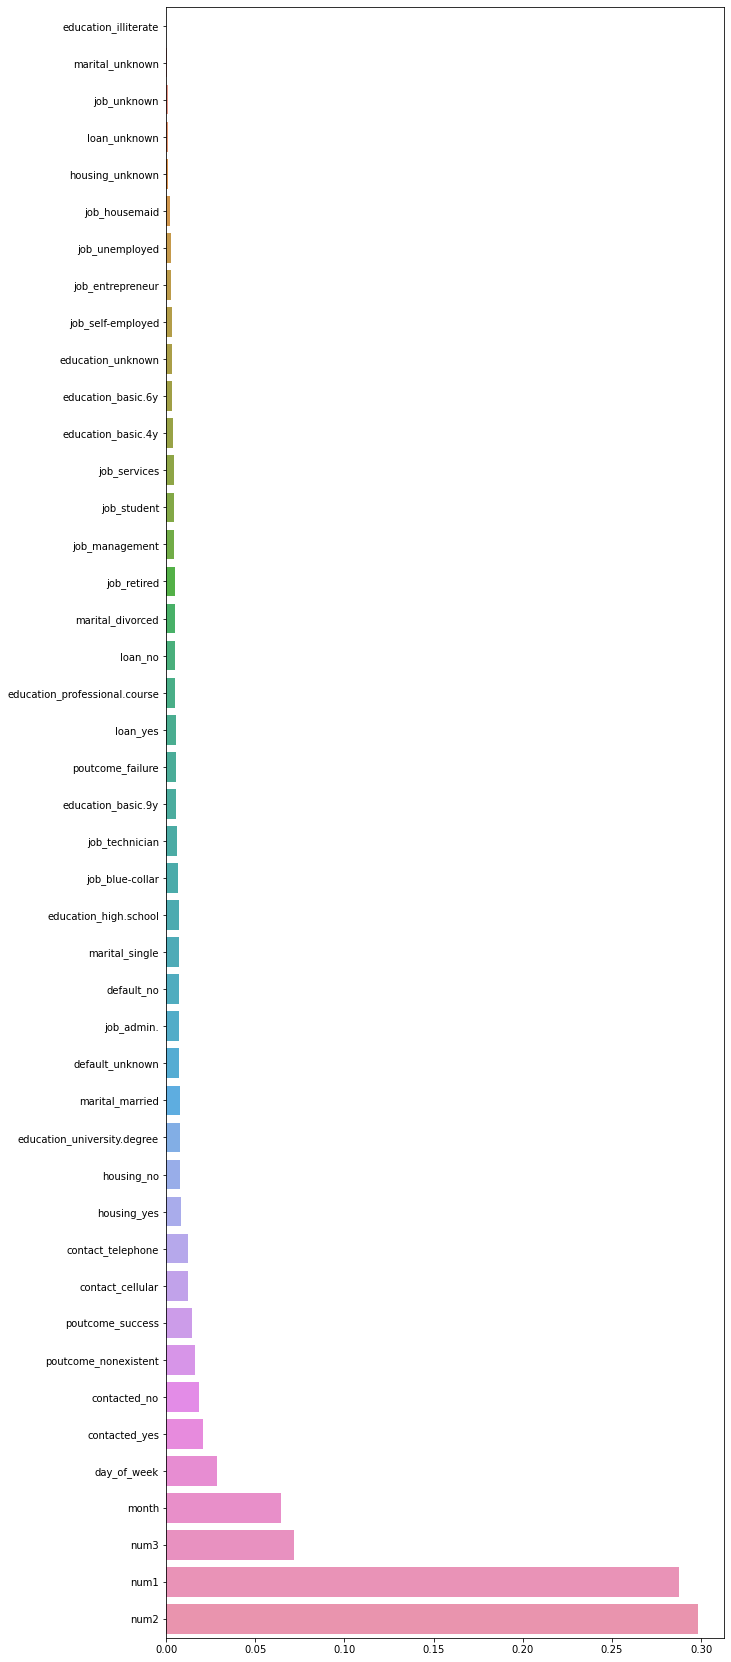

In [255]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_std,y)
fig=pl.figure(figsize=(10,30))
sorted_idx = rf.feature_importances_.argsort()
sns.barplot(y=X_std.columns[sorted_idx], x=rf.feature_importances_[sorted_idx])

In [263]:
from sklearn.feature_selection import SelectFromModel

selector=SelectFromModel(estimator=rf).fit(X_std,y)
selector.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True])

In [256]:
features_imp=pd.DataFrame({'Features':X_std.columns,'Importance':rf.feature_importances_}).sort_values('Importance').reset_index(drop=True)
features_imp['cumulative']=features_imp.Importance.cumsum()

In [257]:
features_imp

,Features,Importance,cumulative
0,education_illiterate,0.000165,0.000165
1,marital_unknown,0.000501,0.000665
2,job_unknown,0.001058,0.001724
3,loan_unknown,0.001190,0.002914
4,housing_unknown,0.001356,0.004269
5,job_housemaid,0.001923,0.006192
6,job_unemployed,0.002829,0.009021
7,job_entrepreneur,0.002843,0.011864
8,job_self-employed,0.003056,0.014921
9,education_unknown,0.003287,0.018208


In [46]:
X_new=X[features_imp.Features[5:]]

In [47]:
X_new_std=scaler.fit_transform(X_new)
X_train, X_test, y_train, y_test = train_test_split(X_new_std, y, test_size=0.25, random_state=12)

# Pendefinisian Model

In [48]:
#Import model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [49]:
#blablabla
#train_test_split

# Evaluasi Model

In [50]:
#blablabla
#train_test_split

# Cross Validation dan Tunning

In [51]:
## Definisi Index Cross Validation dengan StratifiedKFold

kf=StratifiedKFold(5)

In [52]:
#Khusus Gaussian NB
gaussNB=GaussianNB()

acc=[]
idx=[]
for train_idx,test_idx in kf.split(X_new_std,y):
    idx.append([train_idx,test_idx])
    gaussNB.fit(X_new_std[train_idx],y[train_idx])
    acc.append(accuracy_score(y[test_idx],gaussNB.predict(X_new_std[test_idx])))

for i in range(len(acc)):
    if acc[i]==max(acc):
        break

In [53]:
gaussNB.fit(X_new_std[idx[i][0]],y[idx[i][0]])
y_pred_gauss=gaussNB.predict(X_new_std)
acc_gauss=accuracy_score(y,y_pred_gauss)
score=gaussNB.predict_proba(X_new_std)[:,1]
roc_gauss=roc_auc_score(y_pred_gauss,score)
curve_gauss=roc_curve(y_pred_gauss,score)
class_report_gauss=precision_recall_fscore_support(y,y_pred_gauss)

## Hyperparameter Tunning dengan GridSearchCV

In [54]:
models=[
    DecisionTreeClassifier,
    RandomForestClassifier,
    SVC,
    LogisticRegression,
    KNeighborsClassifier,
    GaussianNB
]

gpar=[
    {'max_depth':[4,5,6]}, #DT
    {'n_estimators':[50,100,150],'max_depth':[4,5,6]}, #RF
    {'C':[0.1,0.5,1,1.5],'kernel':['rbf','sigmoid','linear'],'probability':[True]}, #SVC
    {'penalty':['l1','l2'],'solver':['newton-cg','lbfgs'],'fit_intercept':[True]}, #LR
    {'weights':['uniform','distance'],'metric':['euclidean','minkowski']} #KNN
]

In [55]:
#Semua model kecuali GaussianNB
gridsearch=[GridSearchCV(models[i](),gpar[i],cv=kf,scoring='accuracy',verbose=1) for i in range(len(gpar))]

In [56]:
for g in gridsearch:
    g.fit(X_new_std,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/fahmim

/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.85915948 0.85915948]
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


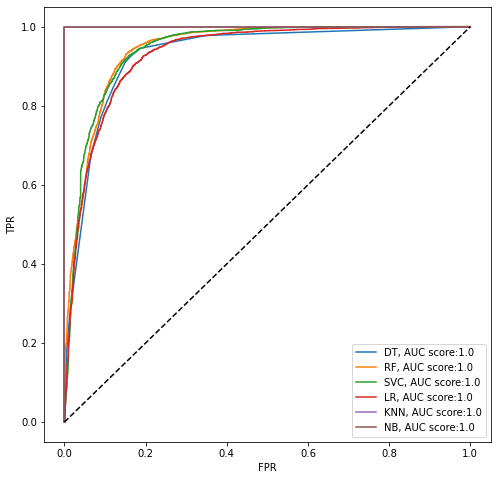

In [57]:
ypred=[grid.predict(X_new_std) for grid in gridsearch]
yscore=[grid.predict_proba(X_new_std)[:,1] for grid in gridsearch]
curve=[roc_curve(y,ysc) for ysc in yscore]
roc_auc_scores=[roc_auc_score(ypred[i],yscore[i]) for i in range(len(gridsearch))]
class_report=[precision_recall_fscore_support(y,pred) for pred in ypred]
accuracy=[accuracy_score(y,pred) for pred in ypred]

roc_auc_scores.append(roc_gauss)
accuracy.append(acc_gauss)
curve.append(curve_gauss)
class_report.append(class_report_gauss)

fig,ax=pl.subplots(figsize=(8,8))
modname=['DT','RF','SVC','LR','KNN','NB']
for i in range(len(modname)):
    ax.plot(curve[i][0],curve[i][1],label='{}, AUC score:{}'.format(modname[i],roc_auc_scores[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.legend()

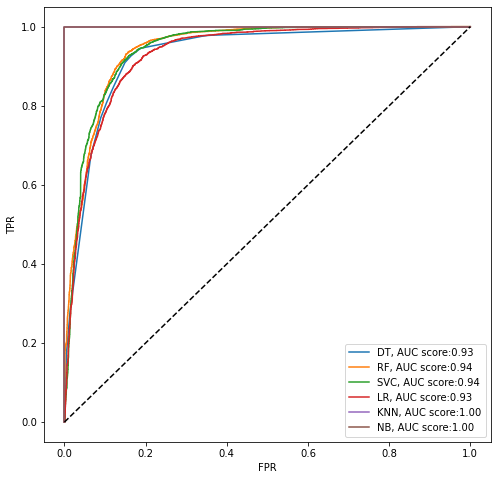

In [58]:
#Fail to calculate roc_auc_score, so I use trapezoid integration
from scipy.integrate import trapezoid
trapezoid(curve[0][1],curve[0][0])
auc_scores=[trapezoid(cur[1],cur[0]) for cur in curve]

fig,ax=pl.subplots(figsize=(8,8))
modname=['DT','RF','SVC','LR','KNN','NB']
for i in range(len(modname)):
    ax.plot(curve[i][0],curve[i][1],label='{}, AUC score:{:.2f}'.format(modname[i],auc_scores[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.legend()

In [59]:
reports=pd.DataFrame(index=modname)
metrics=['precision','recall','f1','support']
for i,col in enumerate(metrics):
    for j,label in enumerate(['no','yes']):
        reports['{}_{}'.format(metrics[i],label)]=np.array(class_report)[:,i,j]
reports['accuracy']=accuracy
reports['auc_score']=auc_scores

reports

,precision_no,precision_yes,recall_no,recall_yes,f1_no,f1_yes,support_no,support_yes,accuracy,auc_score
DT,0.918778,0.849713,0.836207,0.926078,0.875550,0.886253,4640.0,4640.0,0.881142,0.929614
RF,0.929286,0.854921,0.841164,0.935991,0.883032,0.893621,4640.0,4640.0,0.888578,0.944681
SVC,0.902882,0.864355,0.857543,0.907759,0.879629,0.885525,4640.0,4640.0,0.882651,0.943668
LR,0.862530,0.862686,0.862716,0.862500,0.862623,0.862593,4640.0,4640.0,0.862608,0.930664
KNN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4640.0,4640.0,1.000000,1.000000
NB,0.421007,0.420803,0.421552,0.420259,0.421279,0.420531,4640.0,4640.0,0.420905,1.000000


We'll use RF to solve our problem since the f1 no is the highest than others and also the auc score is the highest too.

# Model Inference

In [197]:
#Save model PCA, StandardScaler, and RandomForest, features, also data columns
import pickle

new_dat=data.drop(columns=['y','contacted'])
#dtypes=[new_dat[col].dtypes for col in new_dat.columns]

with open('pca_3d.pkl', 'wb') as f:
    pickle.dump(pca_3d, f)

with open('std_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('randomforest_best.pkl', 'wb') as f:
    pickle.dump(gridsearch[1], f)

with open('datacolumns.pkl', 'wb') as f:
    pickle.dump(pd.DataFrame(columns=new_dat.columns), f)

with open('dtypes.pkl', 'wb') as f:
    pickle.dump(dtypes, f)

dict_month_day={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12,'sun':0,'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6}
with open('dict_month_day.pkl', 'wb') as f:
    pickle.dump(dict_month_day, f)

with open('nominal_cols.pkl', 'wb') as f:
    pickle.dump(nominal.columns.values, f)

with open('ordinal_cols.pkl', 'wb') as f:
    pickle.dump(ordinal.columns.values, f)

with open('numerical_cols.pkl', 'wb') as f:
    pickle.dump(num_dat.columns.values, f)
    
with open('features_list.pkl', 'wb') as f:
    pickle.dump(features_imp.Features[5:].values, f)
    

In [198]:
#Load models

with open('pca_3d.pkl', 'rb') as f:
    pca_mod=pickle.load(f)

with open('std_scaler.pkl', 'rb') as f:
    stdscaler=pickle.load(f)

with open('randomforest_best.pkl', 'rb') as f:
    model=pickle.load(f)

with open('datacolumns.pkl', 'rb') as f:
    df=pickle.load(f)

with open('dtypes.pkl', 'rb') as f:
    col_dtypes=pickle.load(f)

with open('dict_month_day.pkl', 'rb') as f:
    dict_month_day=pickle.load( f)

with open('nominal_cols.pkl', 'rb') as f:
    nominal_cols=pickle.load(f)

with open('ordinal_cols.pkl', 'rb') as f:
    ordinal_cols=pickle.load( f)

with open('numerical_cols.pkl', 'rb') as f:
    numerical_cols=pickle.load( f)

with open('features_list.pkl', 'rb') as f:
    flist=pickle.load(f)

In [154]:
# Model Inference Simulation for Deployment

tmp=[]
for i,col in enumerate(df.columns):
    a = input('Input {} data: '.format(col))

    '''if col_dtypes[i]=='int64':
        tmp.append(int(a))
    elif col_dtypes[i]=='float64':
        tmp.append(float(a))
    else:
        tmp.append(a)
'''
    tmp.append(a)
tmp=pd.Series(tmp,index=df.columns)
df=df.append(tmp,ignore_index=True)

Input age data: 24
Input job data: housemaid
Input marital data: married
Input education data: basic.4y
Input default data: no
Input housing data: no
Input loan data: no
Input contact data: telephone
Input month data: may
Input day_of_week data: mon
Input duration data: 149
Input campaign data: 1
Input pdays data: 201
Input previous data: 0
Input poutcome data: nonexistent
Input emp_var_rate data: 1.1
Input cons_price_idx data: 94
Input cons_conf_idx data: -36.4
Input euribor3m data: 4.857
Input nr_employed data: 5191


In [202]:
## If we have at least one data

df=pd.DataFrame(new_dat.iloc[0]).transpose()

In [203]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [204]:
df['contacted']=df.pdays.apply(lambda x: 'yes' if x!=999 else 'no')
df=df.drop(columns='pdays')

In [205]:
df_num=df[numerical_cols]
df_ord=df[ordinal_cols]
df_nom=df.drop(columns=np.append(numerical_cols,ordinal_cols))

### Numerical Data Preprocessing using PCA

In [209]:
df_num_reduced=pca_mod.transform(df_num)
df_num_reduced

array([[-126.76419856,  -56.14139045,   16.28120305]])

In [238]:
### Ordinal Data Encoding using Dictionary
df_ord_proc=df_ord.replace(dict_month_day)
df_ord_proc

,month,day_of_week
0,5,1


In [229]:
df_nom_proc=pd.DataFrame(columns=nominal_cols)
df_nom_proc

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,contacted_no,contacted_yes


In [271]:
df_nom

,job,marital,education,default,housing,loan,contact,poutcome,contacted
0,housemaid,married,basic.4y,no,no,no,telephone,nonexistent,no


In [236]:
for i in range(len(df_nom)):
    ser_tmp=pd.Series([0 for i in range(len(nominal_cols))],index=nominal_cols)
    for col in df_nom:
        ser_tmp['{}_{}'.format(col,df_nom[col][i])]=1
    df_nom_proc=df_nom_proc.append(ser_tmp,ignore_index=True)

In [237]:
df_nom_proc

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,contacted_no,contacted_yes
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [240]:
features=pd.concat([df_nom_proc,df_ord_proc],axis=1)
features['num1']=df_num_reduced[:,0]
features['num2']=df_num_reduced[:,1]
features['num3']=df_num_reduced[:,2]
features

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_nonexistent,poutcome_success,contacted_no,contacted_yes,month,day_of_week,num1,num2,num3
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,5,1,-126.764199,-56.14139,16.281203


In [241]:
features=features[flist]
features

,job_housemaid,job_unemployed,job_entrepreneur,job_self-employed,education_basic.6y,education_unknown,job_student,job_services,job_management,poutcome_failure,...,poutcome_success,poutcome_nonexistent,contact_telephone,contacted_no,contacted_yes,day_of_week,month,num3,num1,num2
0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,5,16.281203,-126.764199,-56.14139


In [242]:
fscaled=stdscaler.transform(features)
fscaled

array([[ 6.4778826 , -0.16536076, -0.18652176, -0.18024362, -0.22863399,
        -0.22941573, -0.20118496, -0.30840634, -0.27557581, -0.35160022,
         3.05705683, -0.35333905, -0.26408452, -0.41474466, -0.38056667,
         0.45367522, -0.38186447, -0.43191323, -0.48123376, -0.60939397,
         0.85047368, -0.54347559, -0.66508464, -0.43612081,  0.43612081,
         1.10650478, -1.05450029, -0.68810148, -1.59775877, -0.33671549,
         0.51845883,  1.59775877,  0.35237362, -0.35237362, -1.4183509 ,
        -0.77642819,  1.35202976, -0.35201815, -0.64736422]])

In [243]:
if model.predict(fscaled)==0:
    print("Pelanggan cenderung tidak berlangganan")
else:
    print("Pelanggan cenderung berlangganan")

Pelanggan cenderung tidak berlangganan
